# Regional Analysis
### 1. Overview
The cost of eggs has been a frequent news headline in the last six years. The project team sought to identify repeated trends by reviewing USDA data, "National Weekly Sell Egg Inventory". This notebook contains the analysis pertaining to Question #2, "Are spikes in the cost of eggs localized to a specific region?".

Exclusions:
This analysis does not explore the impact of global supply chain disruptions, labor shortages, or other external factors.

### 2. Data intake and cleanup
- Read in csv file from Resources folder, "USDA_Eggs_2024.csv" and create dataframe
- Select fields needed for calculation and reporting
- Filter out data not needed for analysis (only keeping data where 
- Reformat Date data 
- Clean up region data
- Calculate total price (store count * average price) on each row to be used for weighted average prices
- Resulting dataframe, "egg_data_df" was used as the clean source dataset for all levels of analysis

### 3. General processing by Level (Annual by Region, Weekly by Region, Monthly by Region)
- Sum avg price by Level
- Pull out National data into separate dataset for overlay (if needed)
- Exclude National data from plotting dataset
- Create pivot for plotting multiple datasets (if needed)
- Create graph for Level and send image to Output_files

### 4. Annual Level Analysis
General processing steps (Section 3 above) were completed to graph the annual weighted average price by region compared to the national average:
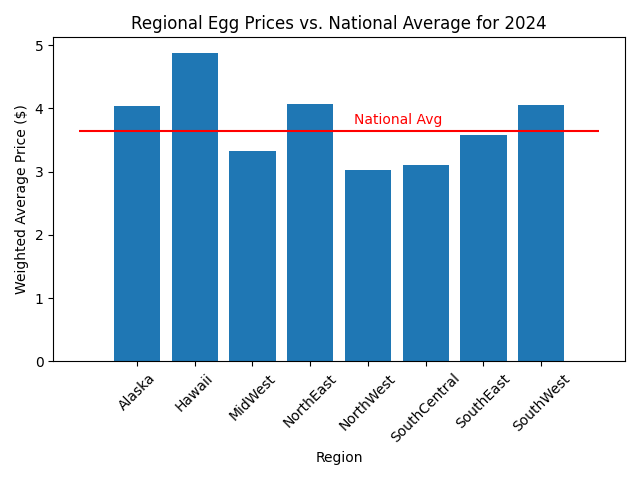

Observations:
1. Looking at the annual average price per region shows that prices in the MidWest, NortWest, SouthCentral and SouthEast regions were below the National Average, whereas prices in Alaska, Hawaii, NorthEast and SouthWest regions were above it.
2. However, this level of detail does not provide any insight into how different regions were impacted by price spikes over the course of 2024. We know there were spikes by looking at the results of the 6-year analysis conducted for Question #1.

Conclusions:
1. More analysis is needed in order to see which regions experience higher price variability and how they are impacted by price spikes.

### 5. Weekly Level Analysis
General processing steps (Section 3 above) were completed to graph the weekly weighted average price by region. All regions are plotted on one line graph so it is easy to see the weekly price variability.
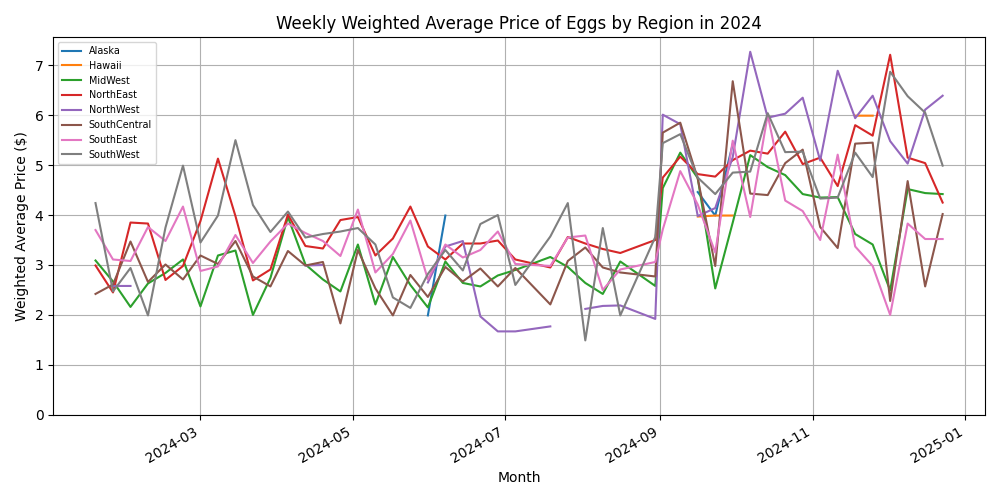

Observations:
1. Data was not reported consistently across the regions. This is evident in that several regions have broken lines, meaning that they did not supply data every week (Alaska, Hawaii and NorthWest).
2. Also, the zig-zags seem to indicate that the prices vary a lot from week to week; however, after further analysis of the store data it appears that some stores report weekly and some report less frequently - thus, skewing the data.
3. Spikes are definitely more evident in this analysis, but it's difficult to differentiate between actual price spikes vs. inconsistent data.

Conclusions:
1. Need to look at monthly averages to help account for the inconsistent reporting and smooth out the zigzags.

### 6. Monthly Level Analysis
General processing steps (Section 3 above) were completed to graph the monthly weighted average price by region compared to the national average. All regions are plotted on one bar graph so it is easy to see the relative monthly prices. The national average is depicted with black line graph overlaying the bars to show how each region compares to the national average on a monthly basis.
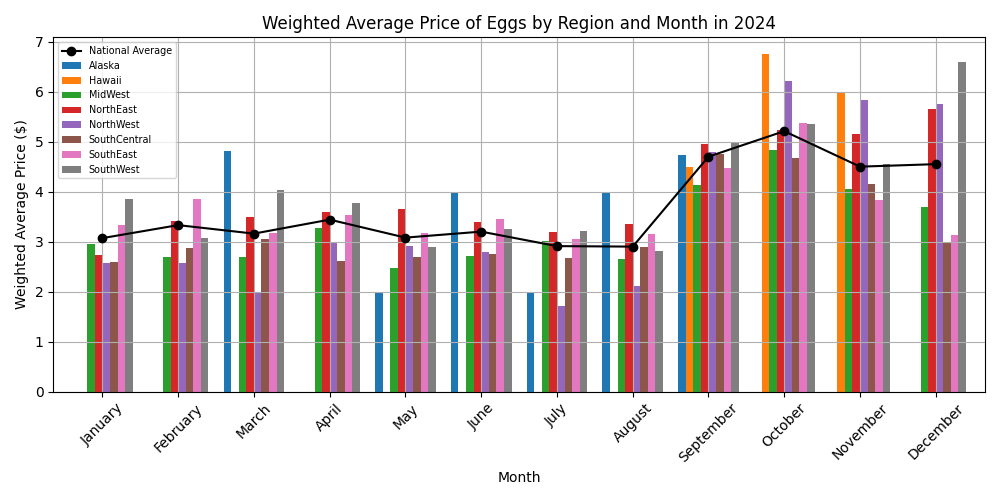

Observations:
1. Omitted prices are easier to see on this graph because columns are missing (Alaska, Hawaii).
2. While the NorthWest was missing some weekly prices, they did have prices submitted every month.
3. Generally speaking all regions followed a similar pattern in 2024, and the surge in prices during August-October was felt by the entire country.
4. Impacts from the August-October price spike were greatest in Hawaii, NorthWest, NorthEast and SouthWest regions.
5. While other regions (SouthEast, SouthCentral and MidWest) had recovered from this spike, returning to levels experienced in the first half of the year, prices in NorthEast and SouthWest regions continue to trend upward. Perhaps this is due to a new spike?

Conclusions:
1. Missing prices are probably the cause for the appearance of lower prices in the early part of the year for the NorthWest region.

### 7. Overall Conclusions
1. Due to a variability in the frequency of reporting across regions, analyzing data at the weekly level is not very useful.
2. Inconsistent/missing submissions from stores in the NorthWest during the first half of the year caused their annual average price to appear lower than the National average.
3. MidWest, SouthEast and SouthCentral regions consistently experienced the lowest prices, most likely due to proximity to egg sources.
4. Due to distance from egg sources, it makes sense that prices in Alaska and Hawaii would be higher than average, but missing data makes analysis of this information less reliable.
5. It appears that the NorthEast, NorthWest and SouthWest regions have more difficulty recovering from price spikes.
6. The upward trend in some regions in December could indicate a new spike.

In [2]:
#Import Dependencies

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import calendar

import warnings
warnings.filterwarnings('ignore')


In [3]:
#Read in CSV file
egg_data = pd.read_csv("Resources/USDA_Eggs_2024.csv")

#Create Dataframe
egg_data.head()

,office_name,office_code,office_city,office_state,report_begin_date,report_end_date,published_date,commodity,slug_id,slug_name,...,type,condition,quality_grade,package_size,price_unit,environment,price_avg,price_min,price_max,store_count
0,"Washington, DC - LP (Retail)",LP-WARE,Washington,DC,12/21/2024,12/27/2024,12/27/2024 9:22,Eggs,2757,AMS_2757,...,Jumbo White,Fresh,A,12,Per Carton,Conventional,2.98,2.98,2.98,40
1,"Washington, DC - LP (Retail)",LP-WARE,Washington,DC,12/21/2024,12/27/2024,12/27/2024 9:22,Eggs,2757,AMS_2757,...,Jumbo White,Fresh,NaN,12,Per Carton,Conventional,2.98,2.98,2.99,61
2,"Washington, DC - LP (Retail)",LP-WARE,Washington,DC,12/21/2024,12/27/2024,12/27/2024 9:22,Eggs,2757,AMS_2757,...,Jumbo White,Fresh,A,12,Per Carton,Conventional,2.99,2.99,2.99,21
3,"Washington, DC - LP (Retail)",LP-WARE,Washington,DC,12/21/2024,12/27/2024,12/27/2024 9:22,Eggs,2757,AMS_2757,...,Medium White,Fresh,NaN,12,Per Carton,Conventional,2.99,2.99,2.99,296
4,"Washington, DC - LP (Retail)",LP-WARE,Washington,DC,12/21/2024,12/27/2024,12/27/2024 9:22,Eggs,2757,AMS_2757,...,Egg Nog,Fresh,Ungraded/Other,64 oz,Per Carton,Conventional,5.88,3.99,5.99,54


In [4]:
# select the fields needed for the analysis
egg_data_df = egg_data[['report_date','region','type','quality_grade','package_size','environment','price_avg', 'store_count','section']]

# filter the rows needed for the analysis - shell eggs only
egg_data_df = egg_data_df.loc[(egg_data_df['section'] == 'Shell Egg')]
  
egg_data_df.head()

,report_date,region,type,quality_grade,package_size,environment,price_avg,store_count,section
0,12/23/2024,Southeast,Jumbo White,A,12,Conventional,2.98,40,Shell Egg
1,12/23/2024,NATIONAL,Jumbo White,NaN,12,Conventional,2.98,61,Shell Egg
2,12/23/2024,Midwest,Jumbo White,A,12,Conventional,2.99,21,Shell Egg
3,12/23/2024,NATIONAL,Medium White,NaN,12,Conventional,2.99,296,Shell Egg
6,12/23/2024,Northwest,Large Brown,A,12,"USDA Organic, Pasture Raised",8.34,30,Shell Egg


In [5]:
# Reformat the date data

egg_data_df['report_dated'] = pd.to_datetime(egg_data_df['report_date'], format='%m/%d/%Y')
egg_data_df['report_month'] = egg_data_df['report_dated'].dt.month

egg_data_df.head()

,report_date,region,type,quality_grade,package_size,environment,price_avg,store_count,section,report_dated,report_month
0,12/23/2024,Southeast,Jumbo White,A,12,Conventional,2.98,40,Shell Egg,2024-12-23,12
1,12/23/2024,NATIONAL,Jumbo White,NaN,12,Conventional,2.98,61,Shell Egg,2024-12-23,12
2,12/23/2024,Midwest,Jumbo White,A,12,Conventional,2.99,21,Shell Egg,2024-12-23,12
3,12/23/2024,NATIONAL,Medium White,NaN,12,Conventional,2.99,296,Shell Egg,2024-12-23,12
6,12/23/2024,Northwest,Large Brown,A,12,"USDA Organic, Pasture Raised",8.34,30,Shell Egg,2024-12-23,12


In [6]:
# Clean up region data

egg_data_df['region'] = egg_data_df['region'].replace({'NATIONAL': 'National', 'Northeast': 'NorthEast',
                                     'Southeast': 'SouthEast', 'Midwest': 'MidWest',
                                     'Southcentral': 'SouthCentral', 'Northwest': 'NorthWest',
                                     'Southwest': 'SouthWest'})
egg_data_df.head()

,report_date,region,type,quality_grade,package_size,environment,price_avg,store_count,section,report_dated,report_month
0,12/23/2024,SouthEast,Jumbo White,A,12,Conventional,2.98,40,Shell Egg,2024-12-23,12
1,12/23/2024,National,Jumbo White,NaN,12,Conventional,2.98,61,Shell Egg,2024-12-23,12
2,12/23/2024,MidWest,Jumbo White,A,12,Conventional,2.99,21,Shell Egg,2024-12-23,12
3,12/23/2024,National,Medium White,NaN,12,Conventional,2.99,296,Shell Egg,2024-12-23,12
6,12/23/2024,NorthWest,Large Brown,A,12,"USDA Organic, Pasture Raised",8.34,30,Shell Egg,2024-12-23,12


In [7]:
# Calculate total price (store count * average price) on each row to be used for weighted average prices

egg_data_df['total_price'] = egg_data_df['store_count'] * egg_data_df['price_avg']
egg_data_df.head()

,report_date,region,type,quality_grade,package_size,environment,price_avg,store_count,section,report_dated,report_month,total_price
0,12/23/2024,SouthEast,Jumbo White,A,12,Conventional,2.98,40,Shell Egg,2024-12-23,12,119.20
1,12/23/2024,National,Jumbo White,NaN,12,Conventional,2.98,61,Shell Egg,2024-12-23,12,181.78
2,12/23/2024,MidWest,Jumbo White,A,12,Conventional,2.99,21,Shell Egg,2024-12-23,12,62.79
3,12/23/2024,National,Medium White,NaN,12,Conventional,2.99,296,Shell Egg,2024-12-23,12,885.04
6,12/23/2024,NorthWest,Large Brown,A,12,"USDA Organic, Pasture Raised",8.34,30,Shell Egg,2024-12-23,12,250.20


In [8]:
# ANNUAL - Sum avg price by Level

# sum the total price and total store count numbers by report date and region
egg_data_annsum_df = egg_data_df.groupby(['region'])[['store_count','total_price']].sum()

# create a new field for the average price by report date and region, round to 2 decimal points
egg_data_annsum_df['reg_avg_price'] = round((egg_data_annsum_df['total_price']/egg_data_annsum_df['store_count']),2)

# reset the index
egg_data_annsum_df.reset_index(inplace=True)
egg_data_annsum_df.head()

,region,store_count,total_price,reg_avg_price
0,Alaska,127,512.66,4.04
1,Hawaii,117,570.77,4.88
2,MidWest,28398,94165.84,3.32
3,National,199738,727248.79,3.64
4,NorthEast,56632,230385.54,4.07


In [9]:
# ANNUAL - Pull out National data into separate dataset for overlay

egg_data_annsum_nat_df = egg_data_annsum_df.loc[(egg_data_annsum_df['region']== 'National')]
egg_data_annsum_nat_df

,region,store_count,total_price,reg_avg_price
3,National,199738,727248.79,3.64


In [10]:
# ANNUAL - Exclude National data from plotting dataset

egg_data_annsum_dropnat_df = egg_data_annsum_df.loc[(egg_data_annsum_df['region']!= 'National')]
egg_data_annsum_dropnat_df.head()

,region,store_count,total_price,reg_avg_price
0,Alaska,127,512.66,4.04
1,Hawaii,117,570.77,4.88
2,MidWest,28398,94165.84,3.32
4,NorthEast,56632,230385.54,4.07
5,NorthWest,16706,50438.51,3.02


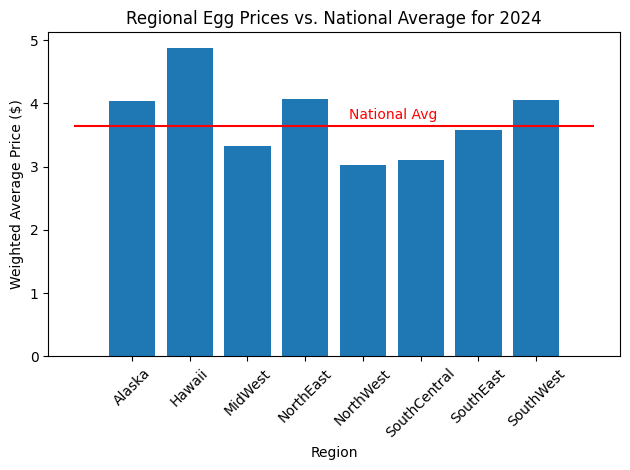

In [11]:
# ANNUAL - Create graph for Level

# create a bar graph showing a column for each region using pandas
ann_nat_avg = egg_data_annsum_nat_df['reg_avg_price']
regions = egg_data_annsum_dropnat_df['region']

plt.bar(regions, egg_data_annsum_dropnat_df['reg_avg_price']) #plot the regional data as columns
plt.hlines(ann_nat_avg, -1, 8, color='red') #plot the National data as a line
plt.ylabel('Weighted Average Price ($)')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.annotate('National Avg', (3.75,3.75), color='red') #label the National Average line for better viewing
plt.title('Regional Egg Prices vs. National Average for 2024')
plt.ylim(bottom=0)

plt.tight_layout()
plt.savefig("Output_files/AnnualAvgPricesByRegionBar.png")
plt.show()

In [12]:
# WEEKLY - Sum avg price by Level

# sum the total price and total store count numbers by report date and region
egg_data_weeksum_df = egg_data_df.groupby(['report_dated','region'])[['store_count','total_price']].sum()

# create a new field for the average price by report date and region, round to 2 decimal points
egg_data_weeksum_df['reg_avg_price'] = round((egg_data_weeksum_df['total_price']/egg_data_weeksum_df['store_count']),2)

# reset the index
egg_data_weeksum_df.reset_index(inplace=True)
egg_data_weeksum_df.head()

,report_dated,region,store_count,total_price,reg_avg_price
0,2024-01-19,MidWest,420,1297.28,3.09
1,2024-01-19,National,4332,15286.97,3.53
2,2024-01-19,NorthEast,1534,4583.93,2.99
3,2024-01-19,SouthCentral,78,189.06,2.42
4,2024-01-19,SouthEast,1010,3738.24,3.70


In [13]:
# WEEKLY - Exclude National data from plotting dataset

egg_data_weeksum_dropnat_df = egg_data_weeksum_df.loc[(egg_data_weeksum_df['region']!= 'National')]
egg_data_weeksum_dropnat_df.head()

,report_dated,region,store_count,total_price,reg_avg_price
0,2024-01-19,MidWest,420,1297.28,3.09
2,2024-01-19,NorthEast,1534,4583.93,2.99
3,2024-01-19,SouthCentral,78,189.06,2.42
4,2024-01-19,SouthEast,1010,3738.24,3.70
5,2024-01-19,SouthWest,1410,5982.00,4.24


In [14]:
# WEEKLY - Create pivot for plotting multiple datasets
egg_data_weeksum_plot_df = egg_data_weeksum_dropnat_df[['report_dated','region','reg_avg_price']]

# use the pivot function to create a matrix of WEEKLY average weighted prices by region and date for plotting
egg_data_weeksum_plot_pivot = egg_data_weeksum_plot_df.pivot(index='report_dated', columns='region', values='reg_avg_price')

egg_data_weeksum_plot_pivot

region,Alaska,Hawaii,MidWest,NorthEast,NorthWest,SouthCentral,SouthEast,SouthWest
report_dated,,,,,,,,
2024-01-19,NaN,NaN,3.09,2.99,NaN,2.42,3.70,4.24
2024-01-26,NaN,NaN,2.67,2.45,2.58,2.61,3.11,2.47
2024-02-02,NaN,NaN,2.16,3.85,2.58,3.47,3.08,2.94
2024-02-09,NaN,NaN,2.63,3.83,NaN,2.66,3.76,1.99
2024-02-16,NaN,NaN,2.84,2.70,NaN,3.01,3.48,3.75
2024-02-23,NaN,NaN,3.11,2.98,NaN,2.71,4.17,4.99
2024-03-01,NaN,NaN,2.17,3.88,1.99,3.19,2.88,3.45
2024-03-08,4.99,NaN,3.19,5.13,NaN,3.02,2.97,3.99
2024-03-15,NaN,NaN,3.29,3.98,NaN,3.48,3.60,5.50


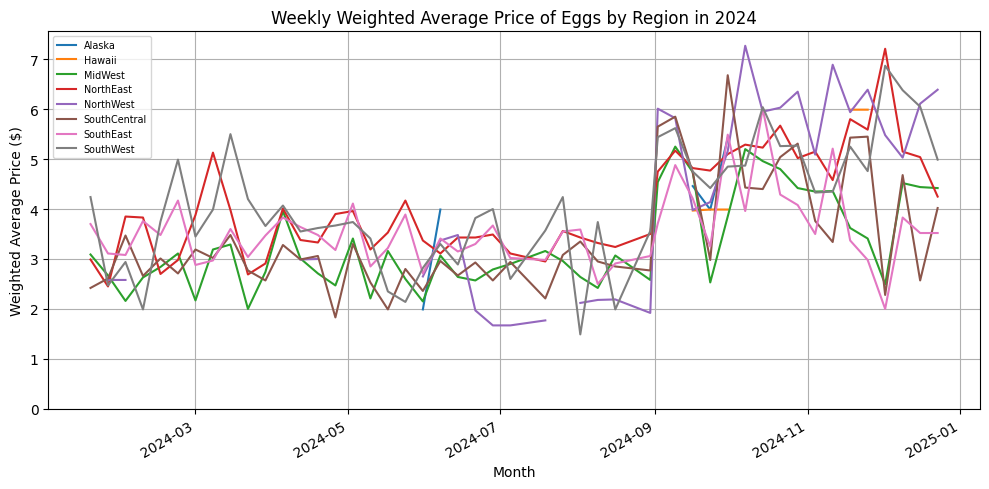

In [15]:
# WEEKLY - Create graph for Level

# create a line graph showing a line for each region using pandas
x_axis = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
tick_locations = [value for value in x_axis]

ax=egg_data_weeksum_plot_pivot.plot(kind='line',
                                      figsize=(10,5),
                                      title='Weekly Weighted Average Price of Eggs by Region in 2024',
                                      grid=True,
                                      xlabel='Month', 
                                      ylabel='Weighted Average Price ($)')

plt.legend(fontsize='x-small')
plt.ylim(bottom=0)
plt.tight_layout()
plt.savefig("Output_files/WeeklyPricesByRegionLine.png")
plt.show()

In [16]:
# MONTHLY - Sum avg price by Level

# sum the total price and total store count numbers by month and region
egg_data_monsum_df = egg_data_df.groupby(['report_month','region'])[['store_count','total_price']].sum()

# create a new field for the average price by report date and region, round to 2 decimal points
egg_data_monsum_df['reg_avg_price'] = round((egg_data_monsum_df['total_price']/egg_data_monsum_df['store_count']),2)

# reset the index
egg_data_monsum_df.reset_index(inplace=True)
egg_data_monsum_df.head()

,report_month,region,store_count,total_price,reg_avg_price
0,1,MidWest,614,1815.50,2.96
1,1,National,9993,30720.73,3.07
2,1,NorthEast,2914,7967.94,2.73
3,1,NorthWest,1364,3525.94,2.58
4,1,SouthCentral,790,2045.90,2.59


In [17]:
# MONTHLY - Pull out National data into separate dataset for overlay

egg_data_monsum_nat_df = egg_data_monsum_df.loc[(egg_data_monsum_df['region']== 'National')]
egg_data_monsum_nat_df.head()

,report_month,region,store_count,total_price,reg_avg_price
1,1,National,9993,30720.73,3.07
8,2,National,15992,53243.45,3.33
16,3,National,18461,58269.49,3.16
23,4,National,15987,55013.70,3.44
31,5,National,22630,69649.83,3.08


In [18]:
# MONTHLY - Exclude National data from plotting dataset

egg_data_monsum_dropnat_df = egg_data_monsum_df.loc[(egg_data_monsum_df['region']!= 'National')]
egg_data_monsum_dropnat_df.head()

,report_month,region,store_count,total_price,reg_avg_price
0,1,MidWest,614,1815.50,2.96
2,1,NorthEast,2914,7967.94,2.73
3,1,NorthWest,1364,3525.94,2.58
4,1,SouthCentral,790,2045.90,2.59
5,1,SouthEast,2766,9205.75,3.33


In [19]:
# MONTHLY - Create pivot for plotting multiple datasets

# pare the table down to the fields needed for plotting
egg_data_monsum_plot_df = egg_data_monsum_dropnat_df[['report_month','region','reg_avg_price']]

# use the pivot function to create a matrix of average weighted prices by region and date for plotting
egg_data_monsum_plot_pivot = egg_data_monsum_plot_df.pivot(index='report_month', columns='region', values='reg_avg_price')

egg_data_monsum_plot_pivot.head()

region,Alaska,Hawaii,MidWest,NorthEast,NorthWest,SouthCentral,SouthEast,SouthWest
report_month,,,,,,,,
1,NaN,NaN,2.96,2.73,2.58,2.59,3.33,3.85
2,NaN,NaN,2.69,3.42,2.58,2.87,3.86,3.08
3,4.81,NaN,2.69,3.50,1.99,3.06,3.18,4.04
4,NaN,NaN,3.27,3.60,2.99,2.62,3.54,3.77
5,1.99,NaN,2.47,3.66,2.92,2.69,3.18,2.89


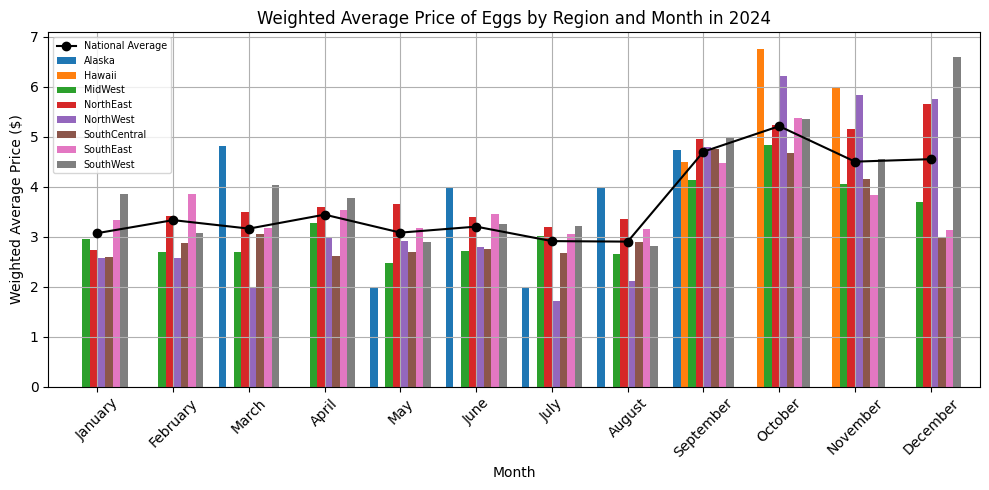

In [20]:
# MONTHLY - Create graph for Level
# create a bar graph showing a line for each region using pandas 
x_axis = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
tick_locations = [value for value in x_axis]

ax=egg_data_monsum_plot_pivot.plot(kind='bar',
                      width=0.8,
                      figsize=(10,5),
                      title='Weighted Average Price of Eggs by Region and Month in 2024',
                      grid=True,
                      xlabel='Month', 
                      ylabel='Weighted Average Price ($)')
ax.set_xticks(egg_data_monsum_plot_pivot.index-1)
ax.set_xticklabels(tick_locations, rotation=45)

# create the National line graph as overlay
plt.plot(x_axis, egg_data_monsum_nat_df['reg_avg_price'], marker='o', label ='National Average', color = 'black')

plt.legend(fontsize='x-small')
plt.ylim(bottom=0)
plt.tight_layout()
plt.savefig("Output_files/MonthlyPricesByRegionBar.png")
plt.show()